## Assignment 2 Regression
### CS450 Spring 2023

We will not use a grading script for this assignment, but the grading criteria is explained in the instructions.
If you are having issues with inconsistent results, try setting seeds. If you find a seed that works for you, keep it in your code so we can see the results you expect us to see when we look at your code.

## Step 1 
**Save a copy in your Drive**

Student Name: Maxine Mayor
<br>If you used pair programming..
<br>Programming Partner:


## Problem 1 (20 points)
### Simple Linear Regression
The purpose of this exercise is to implement a simple linear regression from scratch.
Do not use a library to implement it.
You will generate synthetic data using the linear equation y = 50x + 22
The synthetic data will have some random variation to make the problem interesting. 
* Grading Criteria: The result of your regression should round to the orginal equation. It is not expected to be perfect.
* I have a sample notebook that I will be going over in class. That will get you 80% through problem 1

### Part 1 - Generate Data
1. Randomly select 20 X values between 0 and 100. Use a uniform distribution.
2. Calculate Y values using 50x + 22 + RANDOM_VARIATION
        2.1 The random variation is because we don't want it to be perfect
        2.2 Use a normal distribution with values between -1 and 1 

In [1]:
import numpy as np

In [2]:
#generate 20 values with uniform distribution
X = np.random.uniform(0, 100, 20)
print(X)

#calculate Y values
Y = 50 * X + 22 + np.random.normal(-1, 1, 20)
print(Y)

[46.98042909  9.15749164 76.37690617 47.7034283  83.28749913 65.51904401
 77.28678924 42.01192211 49.48379933 67.91070409 13.91356525 37.77972821
 59.232141   98.69452176 87.32677673 54.13566564 53.35764398  2.87575964
 47.88372854 19.12981414]
[2369.2529361   477.9602477  3839.74721653 2404.80698802 4184.68865276
 3296.01713449 3886.09030603 2121.7802059  2493.35571241 3417.33195404
  716.73297542 1908.46843249 2982.08837302 4958.11199122 4387.53998067
 2726.7283302  2687.86966057  164.15701812 2416.3872548   978.63509385]


### Part 2 - Calculate Regression
Now that you have the data, calcualate the regression. Show your value for slope and intercept. Do not use an libraries to do it for you.
<BR>You have some random variance, so you probably won't get exactly y=50x+22 , but it should round to it.

In [3]:
def regression(X, Y):
    n = len(X)
    mean_X = np.mean(X) #mean
    mean_Y = np.mean(Y)
    xy = np.sum(Y*X - n*mean_Y*mean_X) #sumof squares
    xx = np.sum(X*X - n*mean_X*mean_X)
    slope = xy / xx
    intercept = mean_Y - slope*mean_X
    return slope, intercept

slope, intercept = regression(X, Y)
print("Slope:", slope)
print("Intercept:", intercept)

Slope: 50.40445513833841
Intercept: -0.2634966672221708


### Part 3 - Visualization
Create a visualization
* Include a scatter plot of the data points
* Include the real line for y = 50x +22 in blue
* Include the regression line in red (they may overlap, that is ok)

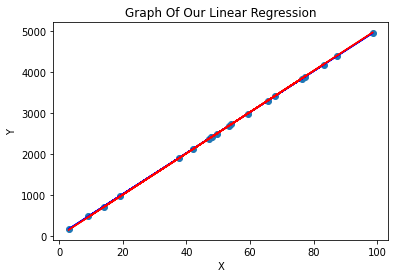

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.plot(X, [50 * x + 22 for x in X], color='blue')
plt.plot(X, [slope * x + intercept for x in X], color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Graph Of Our Linear Regression')
plt.show()

### Part 4 - Create an outlier
Double the Y value for your 10th data point.
Run your regression function again and observe how the equation to the line changes.

In [5]:
#outlier
Y[10] = Y[10] * 2

def regression(X, Y):
    n = len(X)
    mean_X = np.mean(X) #mean
    mean_Y = np.mean(Y)
    xy = np.sum(Y*X - n*mean_Y*mean_X) #sum of squares
    xx = np.sum(X*X - n*mean_X*mean_X)
    slope = xy / xx
    intercept = mean_Y - slope*mean_X
    return slope, intercept

# Use the function to calculate slope and intercept
slope, intercept = regression(X, Y)

# Print the results
print("Slope:", slope)
print("Intercept:", intercept)

Slope: 51.12952916759271
Intercept: -2.132414319781219


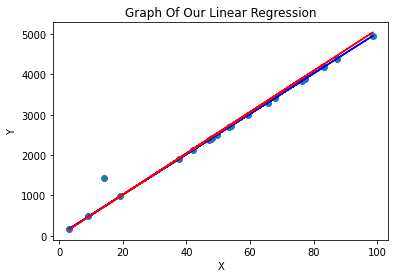

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.plot(X, [50*x + 22 for x in X], color='blue')
plt.plot(X, [slope*x + intercept for x in X], color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Graph Of Our Linear Regression')
plt.show()

## Problem 2 (10 points)
### Multiple Linear Regresion 
You have amodeleady demonstrate that you can implement a simple linear regression. Now we will look at a dataset that use multiple variables.
I am using data from https://www.kaggle.com/datasets/mirichoi0218/insurance?select=insurance.csv

Predict the charges based on the independent variables?
Are all the independent variables really independent? What would you do if they weren't?

I slightly modified the data to add a bit more fun.
If you go to the Kaggle site and click the Code tab, you can see sample notebooks that can help you with this problem. However, remember that I changed some of the data so it is not an exact match.

I placed the modified datafile on github and included code to pull the data into a Panda dataframe.

Train your model on 90% of the data and use the other 10% for validation. How close are the predictions? Explain how you evaluate closeness.

Explain your process for cleaning the data.

Try a few different models that do not use all the independent variables. Do some of them perform better than others?  There are techniques to determine the best subset of features to use, but they are out of scope for this class.



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/willwilson-sdsu/CS550/main/insurance_data_cs450_fa2022.csv")
df.head

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest    16884.924
1      18    male  33.770         1     no  southeast    1725.5523
2      28    male  33.000         3     no  southeast     4449.462
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest    3866.8552
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest   10600.5483
1334   18  female  31.920         0     no  northeast    2205.9808
1335   18  female  36.850         0     no  southeast    1629.8335
1336   21  female  25.800         0     no  southwest     2007.945
1337   61  female  29.070         0    yes  northwest   29141.3603

[1338 rows x 7 columns]>

#### Data Exploration
* We don't go into depth on this in this class, so you do not need to provide an in depth exporatory data analysis. You only need to look into the data enough to determine what cleaning and transformations you need to do before creating your model

In [9]:
df.describe()

,age,bmi,children
count,1338.000000,1337.000000,1338.000000
mean,39.392377,30.722517,1.094918
std,16.060120,6.463766,1.205493
min,-8.000000,15.960000,0.000000
25%,26.250000,26.315000,0.000000
50%,39.000000,30.400000,1.000000
75%,51.000000,34.700000,2.000000
max,320.000000,109.000000,5.000000


In [10]:
df.isnull().sum()

age         0
sex         0
bmi         1
children    0
smoker      1
region      0
charges     0
dtype: int64

\#### What did you determine from your exploration?

**EXPLAIN IN THIS BOX**
*   There is a missing data
*   There are null data
*   There are ages that are impossible because you can't be a negative age or 320 years old
*   There are categorical data




### Data Cleaning

In [11]:
#drop negative ages
df = df[(df.age > 0)] 

#drop ages that are too old
df = df[(df.age < 122)]

#drop categorical
df = df[ (df.charges != 'na') & (df.charges != 'unknown') ] 

# Replacing infinite with nan
df.replace([np.inf, -np.inf], np.nan)

#drop all nan
df = df.dropna() 

#change charges to numerical data
df['charges'] = pd.to_numeric(df['charges'])

#change categorical data to numeric
df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].cat.codes

df['smoker'] = df['smoker'].astype('category')
df['smoker'] = df['smoker'].cat.codes

df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes

df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,4,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,3,1629.83350
1336,21,0,25.800,0,0,4,2007.94500


#### Model Generation

In [12]:
X = df.drop(columns = 'charges')
y = df['charges']

#Train using 90% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9, random_state = 0)

#Train the model
model = LinearRegression()
model.fit(X_train, y_train)

c = model.intercept_
m = model.coef_
print(c)
print(m)

y_pred_train = model.predict(X_train)

-12160.500377422804
[  248.01868117  2454.7544692    292.63468797   425.9237022
 25774.37056134   -71.0964726 ]


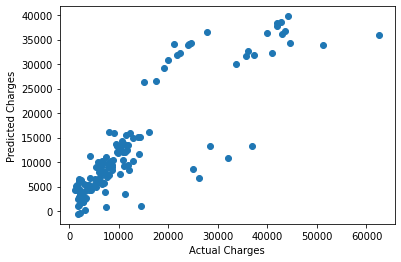

r2: 0.7501005482197025


In [13]:
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

#Evaluate the model using r2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred_train)
print('r2:', r2)

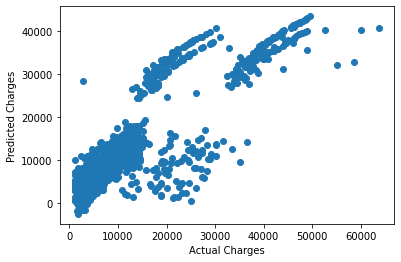

r2: 0.7259762463878081


In [14]:
y_pred_test = model.predict(X_test)

plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

r2 = r2_score(y_test, y_pred_test)
print('r2:', r2)

### Model Analysis

Explain your model and how you could improve it

My r squared value from my prediction is at a 72.6% fit compared to the actual data using the same model it is a 75% fit. Anything above a 70% is generally seen as the better the regression model fits your observations. My model could be improved if I performed transformations onto the data because the data right skewed to turn it into a normal shape. Also as seen in the graph of actual vs predicted charge, the plot is curved so linear assumption fails.